### QED-C Application-Oriented Benchmarks - Qiskit Version
The notebook contains a suite of application-oriented benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [1]:
min_qubits=2
max_qubits=10
skip_qubits=1
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
#backend_id="statevector_simulator"

hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = {}

# # ==========================
# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"; group="YOUR_GROUP_NAME"; project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify an IBMQ backend using a known "backend_id"
# exec_options = { "optimization_level":3, "use_sessions":True, "resilience_level":1}
# backend_id="ibmq_belem"

# # ==========================
# # *** If using Azure Quantum, use this hub identifier and specify the desired backend_id
# # Identify your resources with env variables AZURE_QUANTUM_RESOURCE_ID and AZURE_QUANTUM_LOCATION
# hub="azure-quantum"; group="open"; project="QED-C App-Oriented Benchmarks - Qiskit Version"
# backend_id="<YOUR_BACKEND_NAME_HERE>"

# # ==========================
# The remaining examples illustrate other backend execution options

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # An example using BlueQubit provider (backend_id=CPU/QPU, device=cpu/qpu)
# import os, bluequbit, _common.executors.bluequbit_executor as bluequbit_executor
# provider_backend = bluequbit.init()
# backend_id="BlueQubit-CPU"
# exec_options = { "executor": bluequbit_executor.run, "device":"cpu" }

# # An example using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # Fire Opal can be used to manage executions on other backends, as illustrated here
# import _common.executors.fire_opal_executor as fire_opal_executor
# from _common.executors.fire_opal_executor import FireOpalBackend
# ibm_backend_id = "ibmq_jakarta"
# backend_id = f"fire_opal_{ibm_backend_id}"
# provider_backend = FireOpalBackend(ibm_backend_id=ibm_backend_id, hub=hub, group=group, project=project, token=token)
# exec_options = {"executor": fire_opal_executor.run}


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options.update({ "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation })

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options.update({ "noise_model": custom_qiskit_noise_model.my_noise_model() })

# # Example of mthree error mitigation
# import _common.postprocessors.mthree.mthree_em as mthree_em
# exec_options.update({ "postprocessor": mthree_em.get_mthree_handlers(backend_id, provider_backend) })


### Hamiltonian Simulation - Method 1 

In [ ]:
import sys
sys.path.insert(1, "hamlib/qiskit")
import hamiltonian_simulation_benchmark
hamiltonian_simulation_benchmark.run(min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
                max_circuits=max_circuits, num_shots=num_shots,
                method=1,
                backend_id=backend_id, provider_backend=provider_backend,
                hub=hub, group=group, project=project, exec_options=exec_options)

### Hamiltonian Simulation - Method 2 

Dataset fh-graph-1D-grid-nonpbc-qubitnodes_Lx-1_U-0_enc-jw not found in the file.
No valid dataset found for qubits = 2
Dataset fh-graph-1D-grid-nonpbc-qubitnodes_Lx-1_U-0_enc-jw not found in the file.
No valid dataset found for qubits = 3
Final valid qubits: [4, 6, 8, 10]
valid_qubits [4, 6, 8, 10]
Hamiltonian Simulation Benchmark Program - Qiskit
... execution starting at Jun 26, 2024 23:42:00 UTC
************
Executing [1] circuits with num_qubits = 4
Trying dataset: fh-graph-1D-grid-nonpbc-qubitnodes_Lx-2_U-0_enc-jw
SparsePauliOp(['XXII', 'YYII', 'IIXX', 'IIYY'],
              coeffs=[-0.5+0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j])
        ┌──────────────┐ ░ ┌────────────────────────────────────────────┐ ░  ░ »
   q_0: ┤0             ├─░─┤0                                           ├─░──░─»
        │              │ ░ │                                            │ ░  ░ »
   q_1: ┤1             ├─░─┤1                                           ├─░──░─»
        │  circuit-196 │ ░ │  exp(-it (

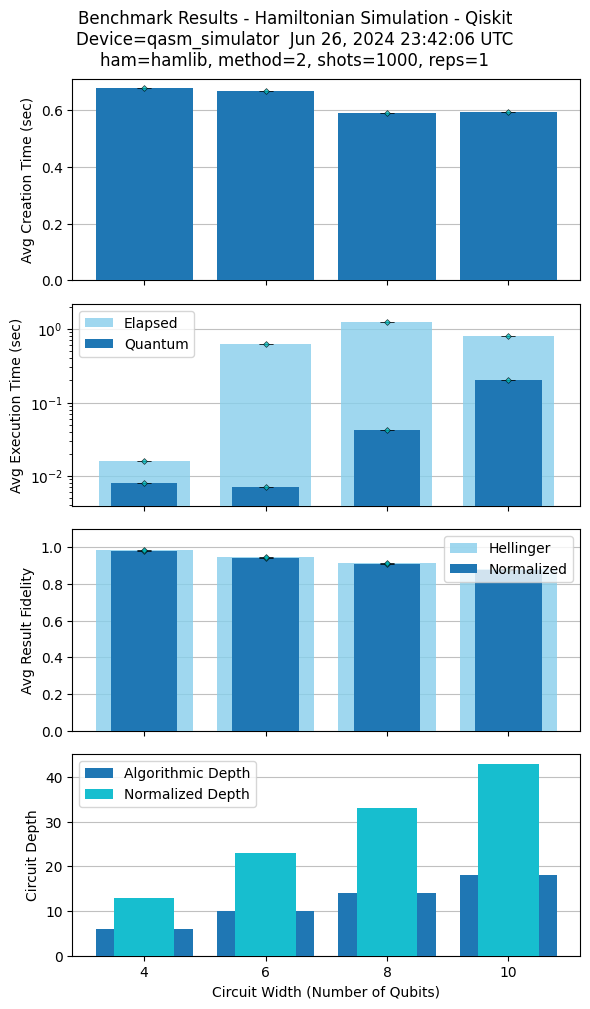

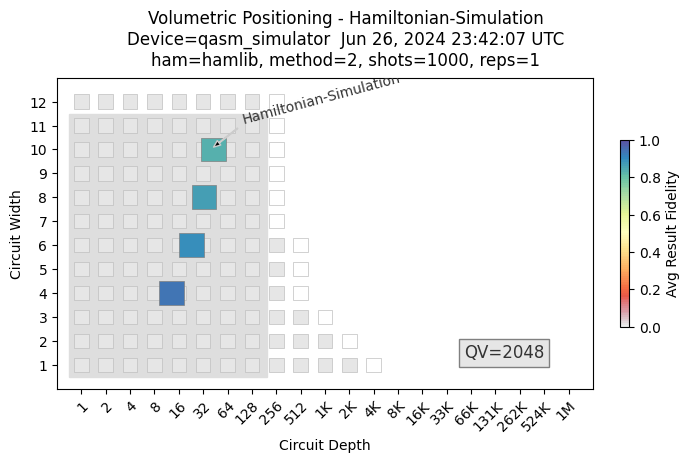

In [2]:
import sys
sys.path.insert(1, "hamlib/qiskit")
import hamiltonian_simulation_benchmark,hamiltonian_simulation_kernel
import execute
execute.verbose = True

# Set the dataset_name_template and filename
# dataset_name_template = 'graph-1D-grid-nonpbc-qubitnodes_Lx-{n_spins}_h-0.1'
# filename = 'tfim.hdf5'

dataset_name_template = 'fh-graph-1D-grid-nonpbc-qubitnodes_Lx-{n_spins/2}_U-0_enc-jw'
filename = 'FH_D-1.hdf5'

# Set the global variables in the hamiltonian_simulation_kernel module
hamiltonian_simulation_kernel.dataset_name_template = dataset_name_template
hamiltonian_simulation_kernel.filename = filename

# Get the valid qubits within the given range
valid_qubits = hamiltonian_simulation_kernel.get_valid_qubits(min_qubits, max_qubits, skip_qubits)
print("valid_qubits", valid_qubits)

# Run the benchmark with the valid qubits range
hamiltonian_simulation_benchmark.run(
    qubit_array=valid_qubits,
    min_qubits=min_qubits, max_qubits=max_qubits, skip_qubits=skip_qubits,
    max_circuits=max_circuits, num_shots=num_shots,
    method=2, backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Combined Benchmark Results

In [ ]:
import sys
sys.path.insert(1, "_common")
import metrics

# metrics.depth_base = 2
# metrics.QV = 0
# apps = [ "Hidden Shift", "Grover's Search", "Quantum Fourier Transform (1)", "Hamiltonian Simulation" ]
# backend_id='qasm_simulator'

metrics.plot_all_app_metrics(backend_id, do_all_plots=False, include_apps=None)